In [1]:
import pandas as pd

resultados_exames = pd.read_csv("exames.csv")
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [2]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico

treino_x, teste_x, treino_y, teste_y =train_test_split(valores_exames,
                                                     diagnostico)

In [3]:
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns="exame_33")

treino_x, teste_x, treino_y, teste_y =train_test_split(valores_exames_v1,
                                                     diagnostico,
                                                      test_size = 0.3)

In [5]:
from sklearn.ensemble import RandomForestClassifier


classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)
print("Resultado da classificação %.2f%%" %(classificador.score(teste_x, teste_y)*100))

Resultado da classificação 92.40%


In [6]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy="most_frequent")
classificador_bobo.fit(treino_x, treino_y)
print("Resultado da classificação boba %.2f%%" %(classificador_bobo.score(teste_x, teste_y)*100))

Resultado da classificação boba 66.67%


<AxesSubplot:xlabel='exames', ylabel='valores'>

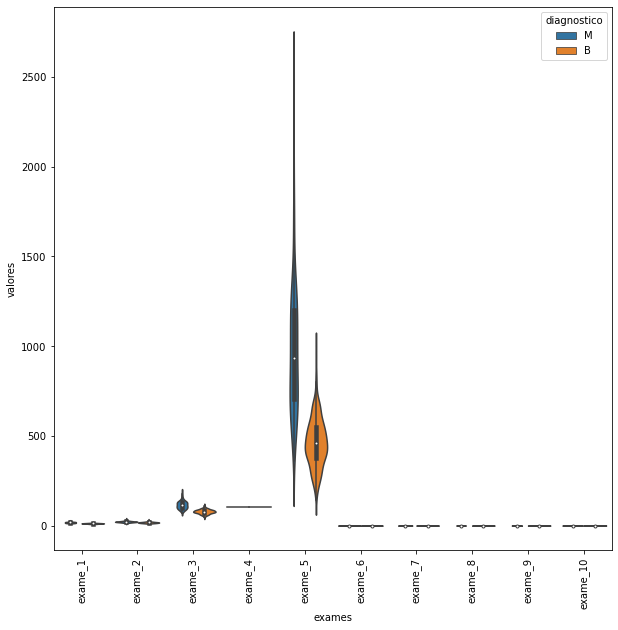

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:, 0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars = "diagnostico",
                    var_name="exames",
                    value_name="valores")

plt.figure(figsize=(10,10))
plt.xticks(rotation = 90)
sns.violinplot(x="exames", y="valores",
              data = dados_plot, hue="diagnostico")

<AxesSubplot:xlabel='exames', ylabel='valores'>

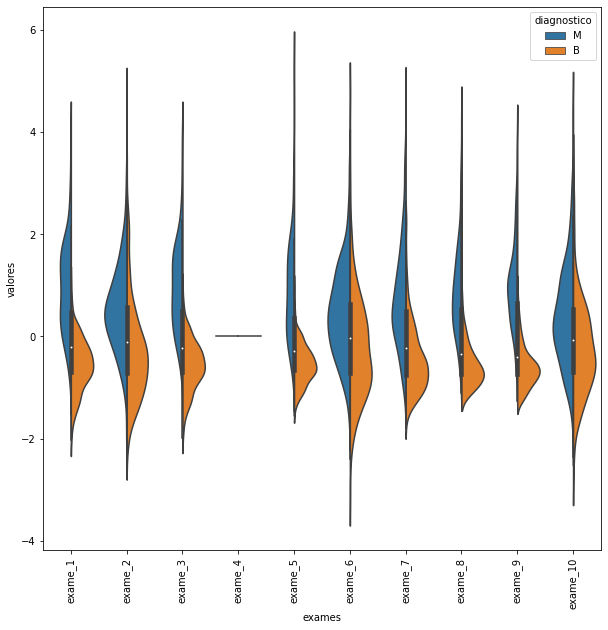

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, 
                                 columns = valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:, 0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars = "diagnostico",
                    var_name="exames",
                    value_name="valores")

plt.figure(figsize=(10,10))
plt.xticks(rotation = 90)
sns.violinplot(x="exames", y="valores",
              hue="diagnostico", data = dados_plot, split=True)

In [9]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:, inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars = "diagnostico",
                        var_name="exames",
                        value_name="valores")

    plt.figure(figsize=(10,10))
    plt.xticks(rotation = 90)
    sns.violinplot(x="exames", y="valores",
                  hue="diagnostico", data = dados_plot, split=True)

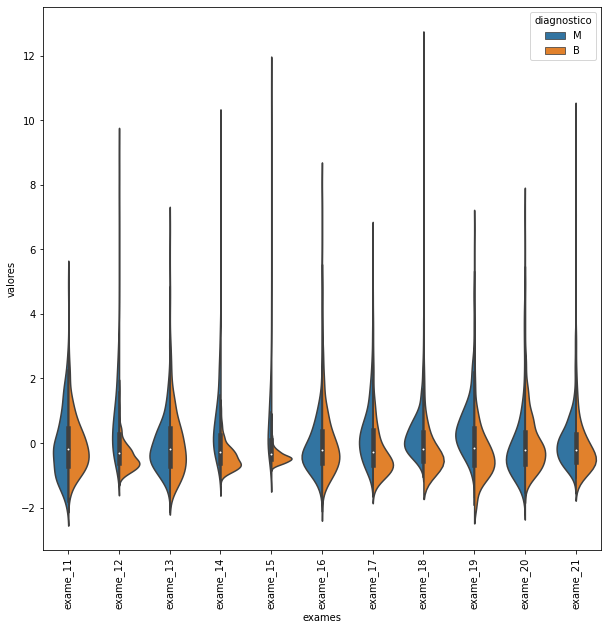

In [10]:
grafico_violino(valores_exames_v2, 10, 21)

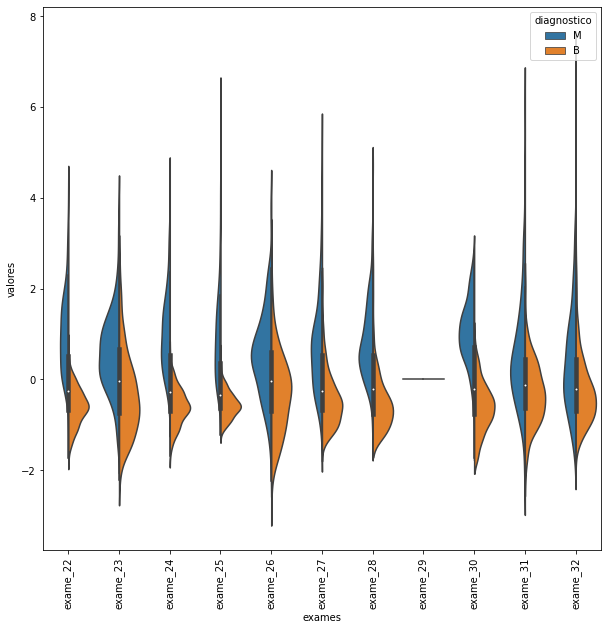

In [11]:
grafico_violino(valores_exames_v2, 21, 32)

In [12]:
valores_exames_v3 = valores_exames_v2.drop(columns=["exame_4", "exame_4"])

def classificar(valores):
    SEED = 1234
    random.seed(SEED)
    treino_x, teste_x, treino_y, teste_y =train_test_split(valores,
                                                     diagnostico,
                                                      test_size = 0.3)
    classificador = RandomForestClassifier(n_estimators=100)
    classificador.fit(treino_x, treino_y)
    print("Resultado da classificação %.2f%%" %(classificador.score(teste_x, teste_y)*100))
    
classificar(valores_exames_v3)

Resultado da classificação 92.98%


<AxesSubplot:>

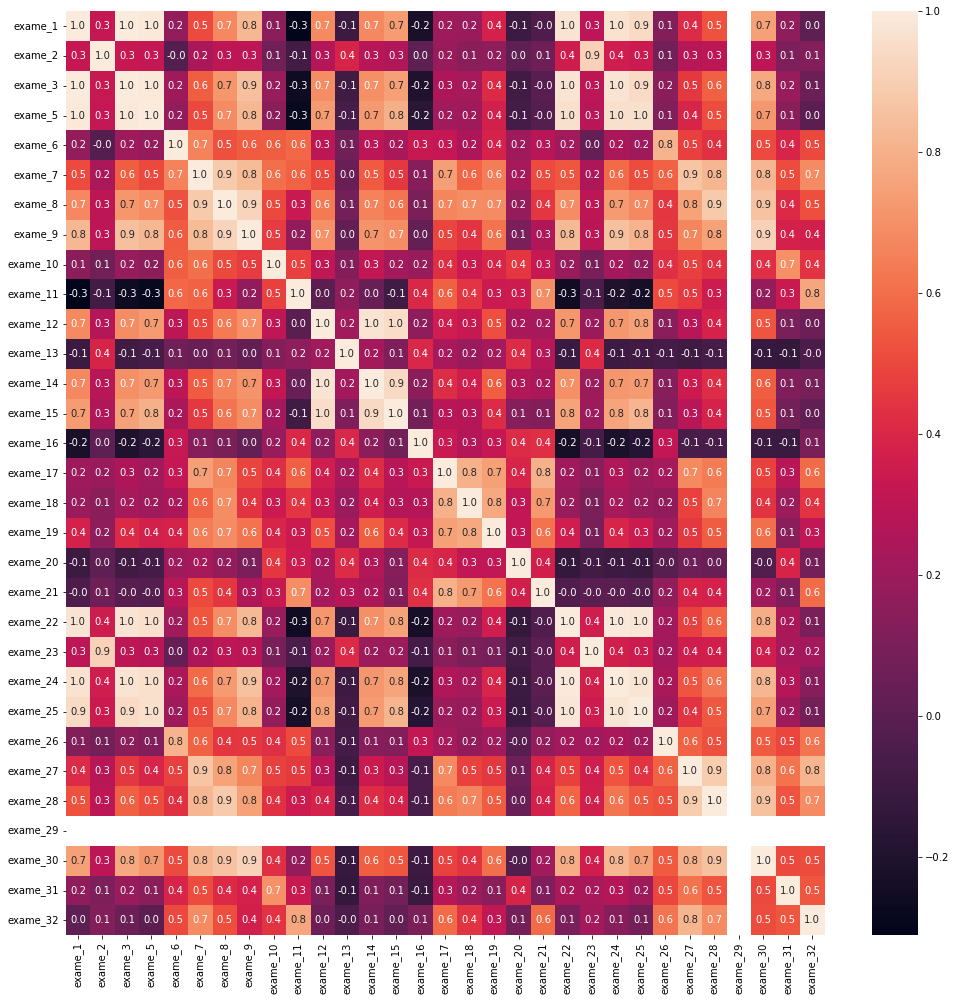

In [16]:
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize = (17, 17))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")

In [17]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()

In [19]:
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_29    0.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [21]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [22]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100


In [23]:
classificar(valores_exames_v4)

Resultado da classificação 92.40%


In [26]:
valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3", "exame_24"])
valores_exames_v5.head()

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100


In [27]:
classificar(valores_exames_v5)

Resultado da classificação 92.40%


In [28]:
classificar(valores_exames_v3)

Resultado da classificação 92.98%
